In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import SwitchingCoordination as sc
import numpy as np
from tqdm import tqdm

from importlib import reload
reload(sc)
# %load_ext autoreload
# %autoreload 2

<module 'SwitchingCoordination' from 'c:\\Users\\sarap\\OneDrive\\Dokumente\\Studium\\8_SOSE_2023\\switching_coordination\\SwitchingCoordination.py'>

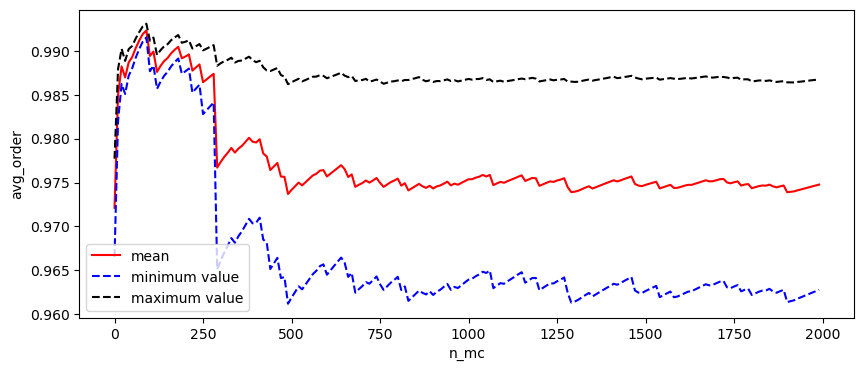

In [75]:
n_mc_reps = 2000

out_data = {}
params = sc.InitParams(N=5, switchingRate=0.3, refTime=1.0)

for mc_iter in np.arange(n_mc_reps):
    
    #perform a single simulation
    out_data_tmp = sc.SingleSimulation(params)
    out_data[mc_iter] = out_data_tmp

random_sampling_arr = [10]*200
sample = np.empty(0)
sample_arr = []
sample_avg_arr = []
minvals = []
maxvals = []

for i, number in enumerate(random_sampling_arr):
    sample = np.concatenate((sample, np.random.choice(out_data[i][0]['order'], number)), axis=None)
    sample_avg_arr.append(np.mean(sample))
    minvals.append(np.mean(sample)-np.var(sample))
    maxvals.append(np.mean(sample)+np.var(sample))

xaxisarr = np.arange(0,2000,10)

plt.figure(figsize=(10,4))
plt.plot(xaxisarr,sample_avg_arr,'r-', label='mean')
plt.plot(xaxisarr,minvals,'b--', label='minimum value')
plt.plot(xaxisarr,maxvals,'k--', label='maximum value')
plt.xlabel('n_mc')
plt.ylabel('avg_order')
plt.legend()

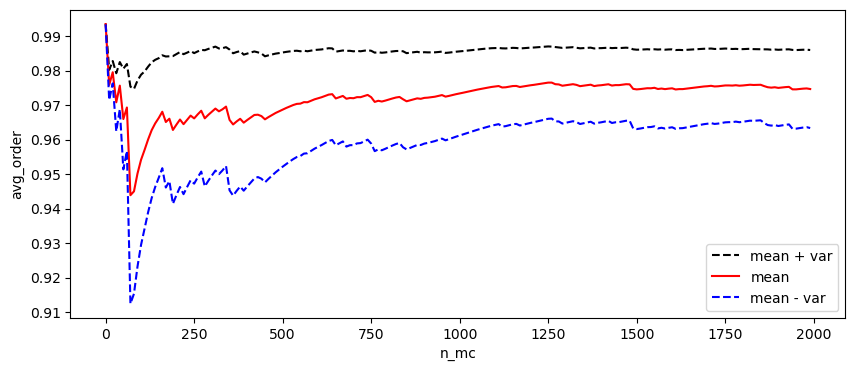

In [74]:
plt.figure(figsize=(10,4))
plt.plot(xaxisarr,maxvals,'k--', label='mean + var')
plt.plot(xaxisarr,sample_avg_arr,'r-', label='mean')
plt.plot(xaxisarr,minvals,'b--', label='mean - var')
plt.xlabel('n_mc')
plt.ylabel('avg_order')
plt.legend()
plt.savefig(f'results/n_mc_2.png', bbox_inches='tight')

In [34]:
df = np.loadtxt('random_order_mean_std_baseline.txt')
float(df[np.where(df[0] == 3),1])

0.4722542951578517